# Implementation of stochastic and batch grandient descent in python
We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
2,1440,3,62.0
15,1175,2,42.0
1,2600,4,120.0
6,2732,4,135.0
7,3300,4,155.0


In [3]:
df["price"].values.reshape(df.shape[0],1).shape


(20, 1)

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop("price",axis=1))
y_scaled = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

print("Scaled X = \n",x_scaled)
print("Scaled Y = \n",y_scaled)

Scaled X = 
 [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
Scaled Y = 
 [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [5]:
len(y_scaled)

20

#### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D


In [6]:
y_scaled = y_scaled.ravel()
y_scaled.shape

(20,)

In [7]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

## Batch Gradient Decent Functio :

In [8]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        # Calculate Y predected
        y_predict = np.dot( thetas , x.T )
        # Getting the gradient with current thetas values
        thetas_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        # Updating thetas values
        thetas = thetas - (learning_rate * thetas_grad)
        # Calculate the cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        if i%10 == 0 :
            cost_list.append(cost)
            epochs_list.append(i)
            theta_1.append(thetas[0])
            theta_2.append(thetas[1])
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [9]:
the_ta, the_ta_1, the_ta_2, cost, cost_list, epoch_list, Hypoth_esis= batch_gradient_descent(x_scaled,y_scaled,500)
the_ta, cost


(array([0.50222029, 0.43322008]), 0.010200154864303318)

In [10]:
Hypoth_esis

[array([0.1526437 , 0.63658901, 0.32744652, 0.34146909, 0.17757271,
        0.17237917, 0.65944061, 0.75777171, 0.30494116, 0.93534442,
        0.38976905, 0.66861587, 0.14294908, 0.1602609 , 0.46767221,
        0.17324476, 0.2824358 , 0.34475833, 0.55769364, 0.        ])]

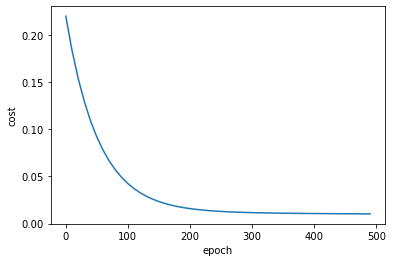

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

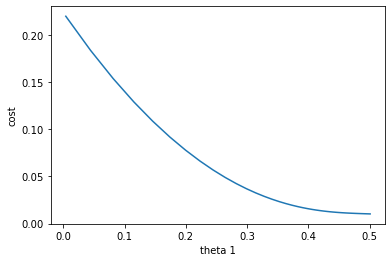

In [52]:

plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(the_ta_1,cost_list)

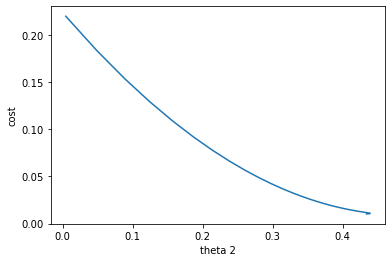

In [53]:

plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(the_ta_2,cost_list)

In [42]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [67]:
predict(2600,4,the_ta)

array([[117.94612934]])

## Getting prediction values using Hypothesis values 

In [103]:
y_hat = []
for i in Hypoth_esis:
    y_hat.append(sy.inverse_transform([i]))
    

In [110]:
# Check the 1D-dimention y_hat

y_hat[0][0]

array([ 52.60689912, 117.9395167 ,  76.20527971,  78.09832658,
        55.97231577,  55.2711873 , 121.02448197, 134.29918099,
        73.16705634, 158.27149676,  84.61882134, 122.26314227,
        51.29812598,  53.63522087,  95.13574838,  55.38804205,
        70.12883297,  78.54237461, 107.28864185,  32.        ])

In [111]:
from sklearn.metrics import r2_score

r2_score(df.price, y_hat[0][0]) 

0.8978217787790322

# Stochastic GD

In [230]:
import random 


def sgd_gradient_descent(x, y_true, epochs, learning_rate = 0.03):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        # Getting Random Index
        rand_index = random.randint(0,Nobservations-1)
        # Calculate Y predected
        y_predict = np.dot( thetas , x[rand_index].T )
        # Getting the gradient with current thetas values
        thetas_grad = (x[rand_index].T.dot(y_predict - y_true[rand_index]))
        # Updating thetas values
        thetas = thetas - (learning_rate * thetas_grad)
        # Calculate the cost value 
        cost = np.square(y_predict - y_true[rand_index])
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [237]:
theta_sgd, thetasgd_1, thetasgd_2, sgd_cost, sgd_cost_list, sgd_epoch_list, sgd_Hypoth_esis= sgd_gradient_descent(x_scaled,y_scaled,450)
theta_sgd, sgd_cost

(array([0.54000452, 0.41410667]), 0.009903689161283712)

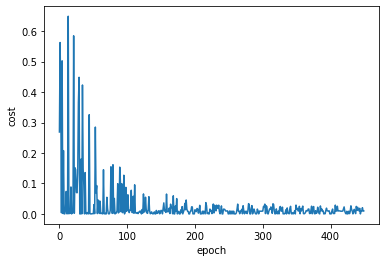

In [238]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(sgd_epoch_list,sgd_cost_list)



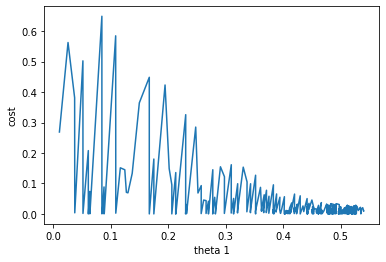

In [239]:

plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(thetasgd_1,sgd_cost_list)


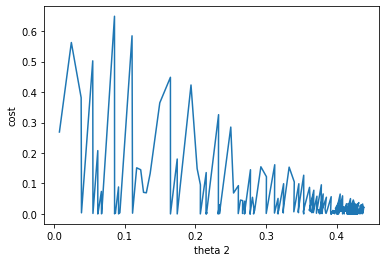

In [240]:
plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(thetasgd_2,sgd_cost_list)

In [241]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [242]:
predict(2600,4,theta_sgd)

array([[119.176955]])

## Getting prediction values using Hypothesis values 

In [243]:
y_hat_sgd = []
for i in Hypoth_esis:
    y_hat_sgd.append(sy.inverse_transform([i]))

# Check the 1D-dimention y_hat

y_hat_sgd[0][0]

array([ 52.60689912, 117.9395167 ,  76.20527971,  78.09832658,
        55.97231577,  55.2711873 , 121.02448197, 134.29918099,
        73.16705634, 158.27149676,  84.61882134, 122.26314227,
        51.29812598,  53.63522087,  95.13574838,  55.38804205,
        70.12883297,  78.54237461, 107.28864185,  32.        ])

In [244]:

r2_score(df.price, y_hat_sgd[0][0]) 

0.8978217787790322

# Mini Batch GD

In [565]:

def minibatch_gradient_descent(x, y_true, epochs, batch_size=2, learning_rate = 0.01):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    N_batchs = int(Nobservations / batch_size)
    for i in range(epochs):
        
        # Getting Random Indexs
        random_indices = np.random.permutation(Nobservations)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,Nobservations,batch_size):
            
            x_batch = x[j : j+batch_size]
            y_batch = y_true[j : j+batch_size]
            
            # Calculate Y predected
            
            y_predict = np.dot(thetas, x_batch.T)
        
            # Getting the gradient with current thetas values
            thetas_grad = (2/len(x_batch))*(x_batch.T.dot(y_predict - y_batch))
            
            # Updating thetas values
            thetas = thetas - (learning_rate * thetas_grad)
            
            # Calculate the cost value 
            cost = np.mean(np.square(y_predict - y_batch))
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
    Hypo = np.dot(thetas, x.T)
    hypothesis.append(Hypo)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [566]:
theta_mini, thetamini_1, thetamini_2, mini_cost, mini_cost_list, mini_epoch_list, mini_Hypothesis= minibatch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0]),20)
theta_mini, mini_cost

(array([0.39789453, 0.40154629]), 0.0011420147145780007)

In [567]:
mini_Hypothesis

[array([0.13551106, 0.54812874, 0.28858435, 0.29969796, 0.15526858,
        0.15115243, 0.5662398 , 0.64417225, 0.2707477 , 0.79944082,
        0.33797816, 0.57351166, 0.12782758, 0.14154808, 0.39972041,
        0.15183845, 0.25291105, 0.30230485, 0.47106702, 0.        ])]

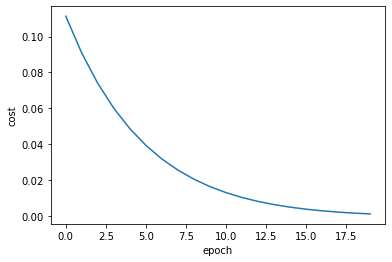

In [568]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(mini_epoch_list,mini_cost_list)

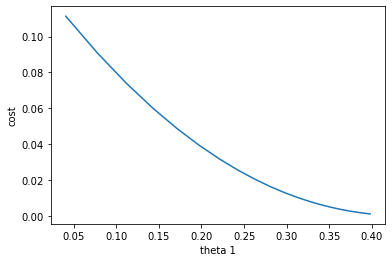

In [569]:
plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(thetamini_1,mini_cost_list)

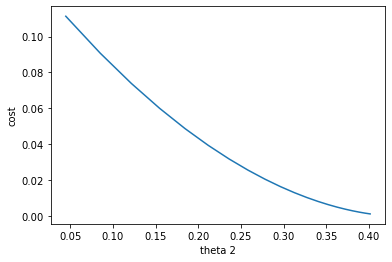

In [570]:
plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(thetamini_2,mini_cost_list)

In [571]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [572]:
predict(1200,2,theta_mini)

52.961257923787784

In [573]:
y_hat_mini = []
for i in mini_Hypothesis:
    y_hat_mini.append(sy.inverse_transform([i]))

# Check the 1D-dimention y_hat

y_hat_mini[0][0]

array([ 50.29399252, 105.99737963,  70.95888762,  72.45922441,
        52.96125792,  52.40557763, 108.44237292, 118.96325313,
        68.55093968, 139.92451105,  77.62705113, 109.42407477,
        49.25672264,  51.10899028,  85.96225553,  52.49819101,
        66.14299175,  72.81115526,  95.59404727,  32.        ])

In [574]:
r2_score(df.price,y_hat_mini[0][0])

0.8412586085386526